Opened database successfully


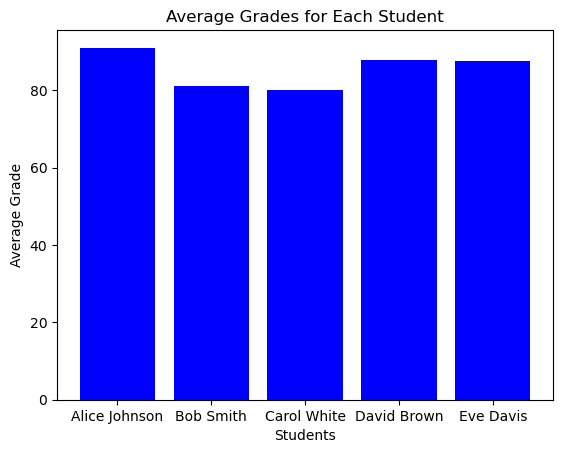

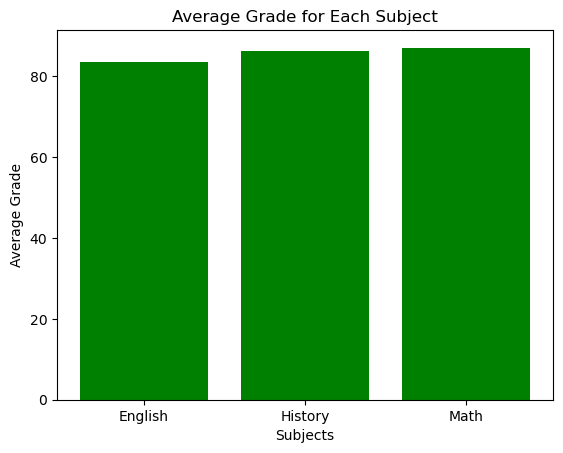

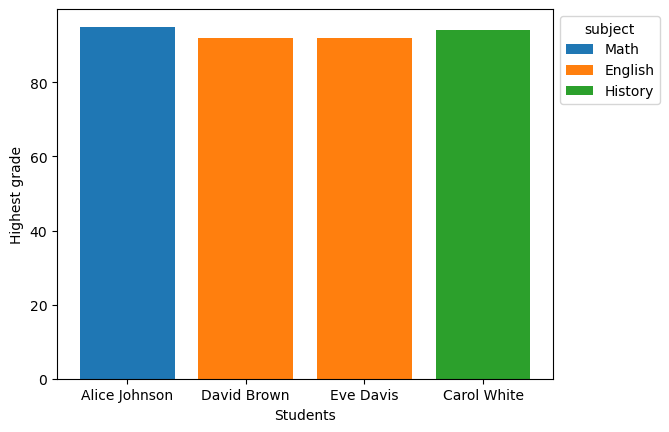

In [70]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt


conn = sqlite3.connect('student_grades.db')
print ("Opened database successfully");


conn.execute('''CREATE TABLE IF NOT EXISTS students (
    student_id,
    first_name TEXT,
    last_name TEXT
);''')

conn.execute('''CREATE TABLE IF NOT EXISTS grades (
    grade_id,
    student_id INTEGER,
    subject TEXT,
    grade INTEGER,
    FOREIGN KEY (student_id) REFERENCES students (student_id)
);''')


students_data = [
    ('Alice', 'Johnson'),
    ('Bob', 'Smith'),
    ('Carol', 'White'),
    ('David', 'Brown'),
    ('Eve', 'Davis')
]

grades_data = [
    (1, 'Math', 95),
    (1, 'English', 88),
    (1, 'History', 90),
    (2, 'Math', 82),
    (2, 'English', 76),
    (2, 'History', 85),

]


conn.executemany('insert into students (first_name, last_name) VALUES (?, ?);', students_data)

conn.executemany('insert into grades (student_id, subject, grade) VALUES (?, ?, ?);', grades_data)


conn.commit()


query_all_students = '''
select s.first_name, s.last_name, g.subject, g.grade
from students s
join grades g on s.student_id = g.student_id;
'''
all_students = pd.read_sql_query(query_all_students, conn)


query_avg_grade = '''
select s.first_name, s.last_name, AVG(g.grade) as average_grade
from students s
join grades g on s.student_id = g.student_id
group by s.student_id;
'''
avg_grades = pd.read_sql_query(query_avg_grade, conn)


query_highest_avg = '''
select s.first_name, s.last_name, AVG(g.grade) as average_grade
from students s
join grades g on s.student_id = g.student_id
group by s.student_id
order by average_grade DESC
LIMIT 1;
'''
highest_avg_student = pd.read_sql_query(query_highest_avg, conn)


query_avg_math = '''
select AVG(grade) as average_math_grade
from grades
where subject = 'Math';
'''
avg_math_grade = pd.read_sql_query(query_avg_math, conn)


query_above_90 = '''
select distinct s.first_name, s.last_name
from students s
join grades g on s.student_id = g.student_id
where g.grade > 90;
'''
students_above_90 = pd.read_sql_query(query_above_90, conn)


students_df = pd.read_sql_query('select * from students;', conn)
grades_df = pd.read_sql_query('select * from grades;', conn)


combined_df = pd.merge(students_df, grades_df, on='student_id')


plt.bar(avg_grades['first_name'] + ' ' + avg_grades['last_name'], avg_grades['average_grade'], color='blue')
plt.xlabel('Students')
plt.ylabel('Average Grade')
plt.title('Average Grades for Each Student')
plt.show()


avg_subjects = grades_df.groupby('subject')['grade'].mean().reset_index()
plt.bar(avg_subjects['subject'], avg_subjects['grade'], color='green')
plt.xlabel('Subjects')
plt.ylabel('Average Grade')
plt.title('Average Grade for Each Subject')
plt.show()


#bonus
query_highest_grade_per_subject = '''
SELECT g.subject, s.first_name, s.last_name, g.grade
FROM grades g
JOIN students s ON g.student_id = s.student_id
WHERE g.grade = (
    SELECT MAX(g2.grade)
    FROM grades g2
    WHERE g2.subject = g.subject
);
'''
highest_grades_per_subject = pd.read_sql_query(query_highest_grade_per_subject, conn)


for subject in highest_grades_per_subject ['subject'].unique():
    data = highest_grades_per_subject[ highest_grades_per_subject ['subject'] == subject]
    plt.bar(data['first_name'] + ' ' + data['last_name'], data['grade'], label=subject)

plt.xlabel ('Students')
plt.ylabel ('Highest grade')
plt.legend(title='subject' , bbox_to_anchor= (1, 1), loc='upper left')
plt.show()


conn.close()
